In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [2]:
#reading and cleaning data from whales return
whale=pd.read_csv('whale_returns.csv' , index_col='Date', infer_datetime_format=True, parse_dates=True)
whale.head()
whale.isnull().count()
whale_df=whale.dropna()

In [3]:

whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
algo=pd.read_csv('algo_returns.csv', index_col='Date',infer_datetime_format=True, parse_dates=True)
algo.head()
algo.isnull().count()
algo_df=algo.dropna()

In [5]:
algo_df
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [6]:
sp=pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [7]:
sp.dtypes

Close    object
dtype: object

In [8]:
#sp['Close']=sp['Close'].str.replace('$','')

In [9]:
sp

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
sp["Close"]=sp["Close"].str.replace("$","")

In [11]:
sp

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [12]:
sp["Close"]=sp["Close"].astype(float)

In [13]:
sp.dtypes

Close    float64
dtype: object

In [14]:
daily_return=sp.pct_change()

In [15]:
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
#checkinbg for nulls and dropping those

In [17]:
daily_return.isnull().dropna()

,Close
Date,
2019-04-23,True
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [18]:
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [232]:
sp_return=daily_return

In [242]:
sp_return=sp_return.rename(columns={'Close':"SP_REURN"})

<AxesSubplot:xlabel='Date'>

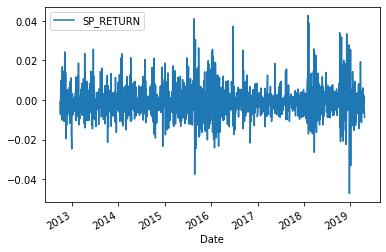

In [243]:
sp_return
sp_return.plot()

In [244]:
#combine dataframes

In [245]:
combine_df=pd.concat([whale_df,algo_df,sp_return], axis='columns',join='outer')

In [246]:
combine_df.sort_index(inplace=True)

In [247]:
combine_df=pd.DataFrame(combine_df)


In [248]:
combine_df=combine_df.dropna()

<AxesSubplot:xlabel='Date'>

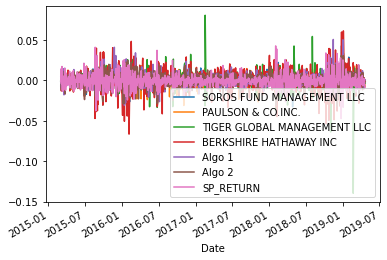

In [249]:
combine_df.plot()

In [250]:
combine_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_RETURN
Date,,,,,,,
2015-03-03,False,False,False,False,False,False,False
2015-03-04,False,False,False,False,False,False,False
2015-03-05,False,False,False,False,False,False,False
2015-03-06,False,False,False,False,False,False,False
2015-03-09,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2019-04-15,False,False,False,False,False,False,False
2019-04-16,False,False,False,False,False,False,False
2019-04-17,False,False,False,False,False,False,False


In [251]:
#conducting Quantitative analysis

In [320]:
#cummulative returns for combined dataframe
combine_df['SP_RETURN'].cumsum()

Date
2015-03-03    0.004408
2015-03-04    0.003213
2015-03-05    0.017591
2015-03-06    0.013662
2015-03-09    0.030916
                ...   
2019-04-15   -0.283222
2019-04-16   -0.280943
2019-04-17   -0.282520
2019-04-18   -0.283531
2019-04-22   -0.292295
Name: SP_RETURN, Length: 1042, dtype: float64

In [253]:
#daily return
all_daily_return=combine_df.pct_change()
all_daily_return.iloc[:,1]

Date
2015-03-03          NaN
2015-03-04    -1.650792
2015-03-05     0.257544
2015-03-06    -1.876837
2015-03-09    -2.182252
                ...    
2019-04-15    -0.007347
2019-04-16    -1.335693
2019-04-17   -17.661104
2019-04-18    -1.188925
2019-04-22    -7.001458
Name: PAULSON & CO.INC. , Length: 1042, dtype: float64

In [254]:
all_daily_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_RETURN
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-5.391499


<AxesSubplot:xlabel='Date'>

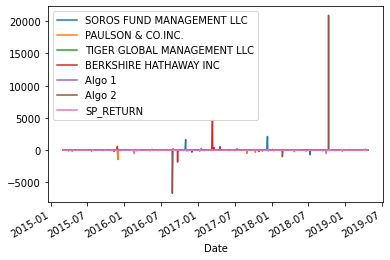

In [255]:
all_daily_return.plot()

In [256]:
#calculating cumulative returns
#all_daily_return_df=pd.DataFrame(all_daily_return())

In [257]:
cumul_returns=(1+all_daily_return).cumprod()-1

In [258]:
cumul_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_RETURN
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,2.261847
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,-1.891356
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,2.914389


<AxesSubplot:title={'center':'Cumulative Returns over the Years'}, xlabel='Date'>

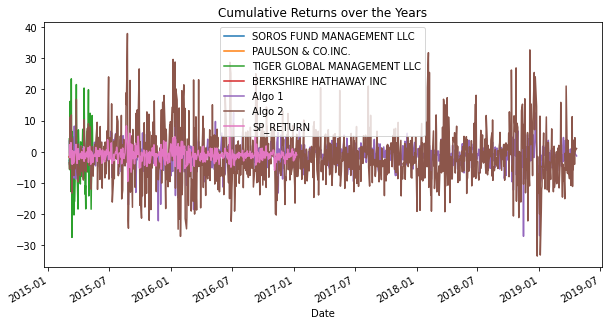

In [259]:
cumul_returns.plot(figsize=(10,5), title="Cumulative Returns over the Years") 

#birkshire hathaway and tiger global management are more riskky while paulson is risk free

<AxesSubplot:>

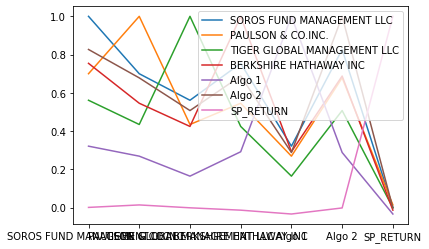

In [261]:

corr_com=combine_df.corr()
corr_com.head()
corr_com.plot()

<AxesSubplot:>

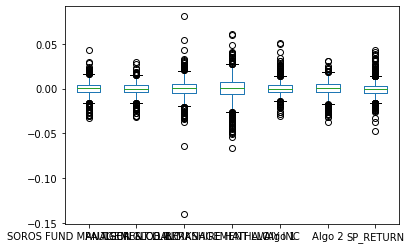

In [262]:


#we have to take our risk analysis by first creating box plot for each portfolio returns 
combine_df.plot.box()

<AxesSubplot:>

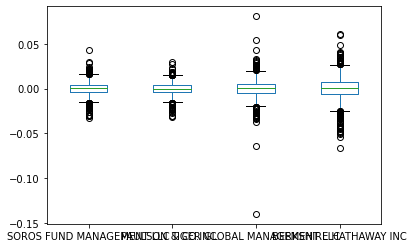

In [273]:
whale_df.plot.box()

<AxesSubplot:>

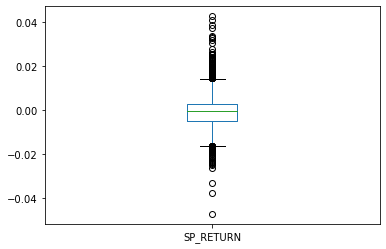

In [272]:
sp_return.plot.box()

In [267]:
#calculating the std of all prtfolios and also finding the risk free
com_std=combine_df.std()
risk_com=com_std.sort_values(ascending=False)
risk_com

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP_RETURN                      0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [269]:
combine_df['SP_RETURN'].std()

0.00858688974707399

most risky compares to sp return is  berkshire hathaway

In [270]:
# Calculating the annualized standard deviation for sp,algo and whale(252 trading days)
combine_df_annu = com_std * np.sqrt(252)
combine_df_annu

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP_RETURN                      0.136313
dtype: float64

In [55]:
#calculating the rolling stastistics with a 21 day window for all portfoliosand plot

<AxesSubplot:xlabel='Date'>

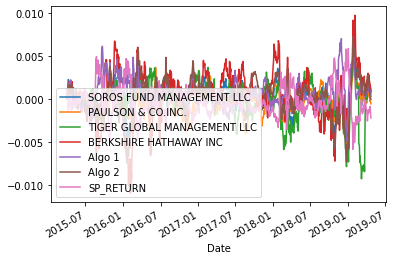

In [276]:
com_rolling=combine_df.rolling(window=21).mean()
com_rolling.plot()

In [282]:
#calculating the correlation
corr_combine=combine_df.corr()

<AxesSubplot:>

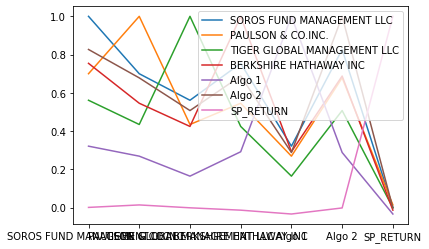

In [283]:
corr_combine.plot()

In [66]:
# Calculating covariance of a single portfolio with sp500

In [284]:
covar=sp_return['SP_RETURN'].cov(algo_df['Algo 1'])

In [285]:
covar

-3.243204804816927e-06

In [286]:
#now lets calculate the varicance between of sp500
algo_var=algo_df['Algo 1'].var()

In [287]:
algo_var

6.380355548579518e-05

In [288]:
algo1_beta=covar/algo_var

In [72]:
algo1_beta

-0.05083109836314645

In [289]:
#calculating the rolling and covarince and also ploting the graph
covar_rolling=sp_return['SP_RETURN'].rolling(window=21).cov(algo_df['Algo 1'])

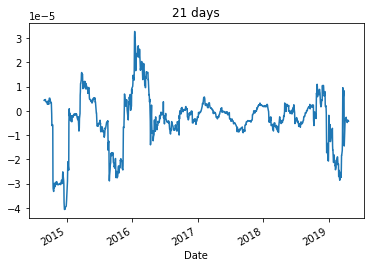

In [292]:
covar_rolling.plot(title='21 days',);

In [78]:

tim=algo_df['Algo 1'].index

ewmm=algo_df['Algo 1'].ewm(halflife='21', times=(tim)).mean()


In [79]:
ewmm

Date
2014-06-05    0.004062
2014-06-06    0.001857
2014-06-09   -0.005012
2014-06-10    0.004406
2014-06-11    0.004760
                ...   
2019-04-25    0.000682
2019-04-26    0.002981
2019-04-29    0.005208
2019-04-30   -0.002944
2019-05-01    0.000094
Name: Algo 1, Length: 1235, dtype: float64

In [80]:
#calculating sharpi ratio, which is comparing the return from the risk free return by the standard deviation

In [321]:
sharp_com=((combine_df.mean()-(combine_df.iloc[:,1]).mean())*250)/(com_std*np.sqrt(250))#using paulson as the risk free rate
sharp_com

SOROS FUND MANAGEMENT LLC      0.777027
PAULSON & CO.INC.              0.000000
TIGER GLOBAL MANAGEMENT LLC    0.185893
BERKSHIRE HATHAWAY INC         0.870514
Algo 1                         1.815266
Algo 2                         0.894670
SP_RETURN                     -0.116053
dtype: float64

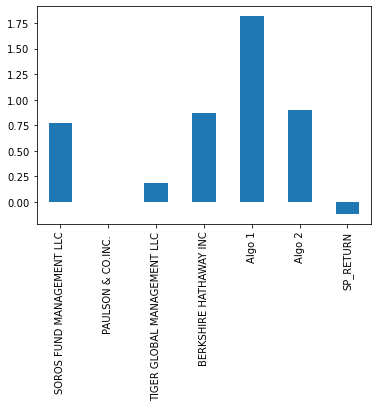

In [322]:
sharp_com.plot.bar();

In [87]:
#Determine whether fthe algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

algo does outperform all them

In [89]:
#creating a custom portfolio

#aapl google and costco

In [549]:
costco=pd.read_csv('COST_2019.csv', infer_datetime_format=True, parse_dates=True)

In [550]:
costco_df=costco.dropna()

In [551]:
#lets make the date appear by itselft and also set the date as index
costco_df['Date'] = costco_df['Date'].str.split(' ',expand=True)[0]

In [552]:
#setting date as index
costco_df=costco_df.set_index('Date')

In [553]:
costco_df

,Close
Date,
1/2/2019,204.76
1/3/2019,200.42
1/4/2019,206.24
1/7/2019,207.00
1/8/2019,208.55
...,...
12/23/2019,293.31
12/24/2019,294.23
12/26/2019,295.73


In [554]:

#renaming fom'close' to costco
costco_df=costco_df.rename(columns={'Close':"COSTCO"})

In [555]:
costco_df.head()

,COSTCO
Date,
1/2/2019,204.76
1/3/2019,200.42
1/4/2019,206.24
1/7/2019,207.00
1/8/2019,208.55


In [529]:
#aapl declaration

In [556]:
aapl=pd.read_csv('AAPL_2019 .csv', infer_datetime_format=True, parse_dates=True,)

In [557]:
aapl=aapl.dropna()

In [558]:
#lets make the date appear by itselft and also set the date as index
aapl['Date'] = aapl['Date'].str.split(' ',expand=True)[0]

In [559]:
#setting date as index
aapl=aapl.set_index('Date')

In [560]:
aapl.head()

,Close
Date,
1/2/2019,39.48
1/3/2019,35.55
1/4/2019,37.07
1/7/2019,36.98
1/8/2019,37.69


In [561]:

aapl=aapl.rename(columns={'Close':"AAPL"})

In [562]:
aapl.head(2)

,AAPL
Date,
1/2/2019,39.48
1/3/2019,35.55


In [537]:
#google close to returns processes

In [563]:
google=pd.read_csv('GOOGLE_2019.csv', infer_datetime_format=True, parse_dates=True)

In [564]:
google.head(2)

,Date,Close
0,1/2/2019 16:00:00,1045.85
1,1/3/2019 16:00:00,1016.06


In [565]:
google=google.dropna()

In [566]:
#lets make the date appear by itselft and also set the date as index
google['Date'] =google['Date'].str.split(' ',expand=True)[0]

In [567]:
google=google.set_index('Date')

In [568]:
google.head(2)

,Close
Date,
1/2/2019,1045.85
1/3/2019,1016.06


In [569]:
google=google.rename(columns={'Close':"GOOGLE"})

In [570]:
google.tail(3)

,GOOGLE
Date,
12/26/2019,1360.40
12/27/2019,1351.89
12/30/2019,1336.14


In [571]:
#combining our custom dataframe

combined_custom_df=pd.concat([google,aapl,costco_df], axis='columns',join='inner',)

In [572]:
combined_custom_df.sort_index(inplace=True)

In [573]:
combined_custom_df.head(5)

,GOOGLE,AAPL,COSTCO
Date,,,
1/10/2019,1070.33,38.45,210.64
1/11/2019,1057.19,38.07,210.51
1/14/2019,1044.69,37.50,209.00
1/15/2019,1077.15,38.27,211.03
1/16/2019,1080.97,38.74,210.18


In [574]:
#calculating daily return for all the portfolios

Custom_return=combined_custom_df.pct_change()

In [575]:
#dropping some na's
Custom_return=Custom_return.dropna()

In [576]:
#displaying sample data
Custom_return.head(5)

,GOOGLE,AAPL,COSTCO
Date,,,
1/11/2019,-0.012277,-0.009883,-0.000617
1/14/2019,-0.011824,-0.014972,-0.007173
1/15/2019,0.031071,0.020533,0.009713
1/16/2019,0.003546,0.012281,-0.004028
1/17/2019,0.008261,0.005937,0.006090


In [577]:
# Set weights
weights = [1/3, 1/3, 1/3]


In [578]:
#calculating weighted returns
custom_weighted_returns=Custom_return.dot(weights)

In [579]:
custom_weighted_returns.head()

Date
1/11/2019   -0.007592
1/14/2019   -0.011323
1/15/2019    0.020439
1/16/2019    0.003933
1/17/2019    0.006763
dtype: float64

In [580]:
comb_cust_weight=pd.concat([Custom_return,custom_weighted_returns], axis='columns',join='inner')

In [581]:
comb_cust_weight.sort_index(inplace=True)

In [582]:
comb_cust_weight=comb_cust_weight.rename(columns={0:"My_return"})

In [583]:
comb_cust_weight.isnull().count()

GOOGLE       250
AAPL         250
COSTCO       250
My_return    250
dtype: int64

In [584]:
comb_cust_weight=comb_cust_weight.replace([np.inf, -np.inf], np.nan)
comb_cust_weight.head(10)

,GOOGLE,AAPL,COSTCO,My_return
Date,,,,
1/11/2019,-0.012277,-0.009883,-0.000617,-0.007592
1/14/2019,-0.011824,-0.014972,-0.007173,-0.011323
1/15/2019,0.031071,0.020533,0.009713,0.020439
1/16/2019,0.003546,0.012281,-0.004028,0.003933
1/17/2019,0.008261,0.005937,0.006090,0.006763
1/18/2019,0.007670,0.006159,0.010073,0.007967
1/2/2019,-0.047721,0.006886,-0.041341,-0.027392
1/22/2019,0.023588,-0.029129,0.037312,0.010591
1/23/2019,0.004717,0.003913,-0.001460,0.002390


In [585]:
comb_cust_weight=comb_cust_weight.dropna()
comb_cust_weight.head(5)

,GOOGLE,AAPL,COSTCO,My_return
Date,,,,
1/11/2019,-0.012277,-0.009883,-0.000617,-0.007592
1/14/2019,-0.011824,-0.014972,-0.007173,-0.011323
1/15/2019,0.031071,0.020533,0.009713,0.020439
1/16/2019,0.003546,0.012281,-0.004028,0.003933
1/17/2019,0.008261,0.005937,0.006090,0.006763


In [586]:
#calculating for risk analysis
#calctulatin the annualised std
com_std=comb_cust_weight.std()

In [587]:
com_annualized_std =com_std * np.sqrt(252)

In [588]:
com_annualized_std.head()


GOOGLE       0.438855
AAPL         0.877152
COSTCO       0.564857
My_return    0.568163
dtype: float64

In [589]:
#calculating and ploting rolling std with 21 day window
cust_roll=(comb_cust_weight.rolling(window=21).mean()).dropna()
cust_roll

,GOOGLE,AAPL,COSTCO,My_return
Date,,,,
10/1/2019,0.006309,0.023118,0.016881,0.015436
10/10/2019,0.007035,0.024751,0.019126,0.016970
10/11/2019,0.007865,0.026730,0.019541,0.018045
10/14/2019,0.006451,0.025688,0.019066,0.017068
10/15/2019,0.007295,0.024990,0.019397,0.017227
...,...,...,...,...
9/30/2019,0.001403,0.003964,-0.000613,0.001585
9/4/2019,0.001369,0.004338,0.005503,0.003737
9/5/2019,0.001848,0.004370,0.004883,0.003701


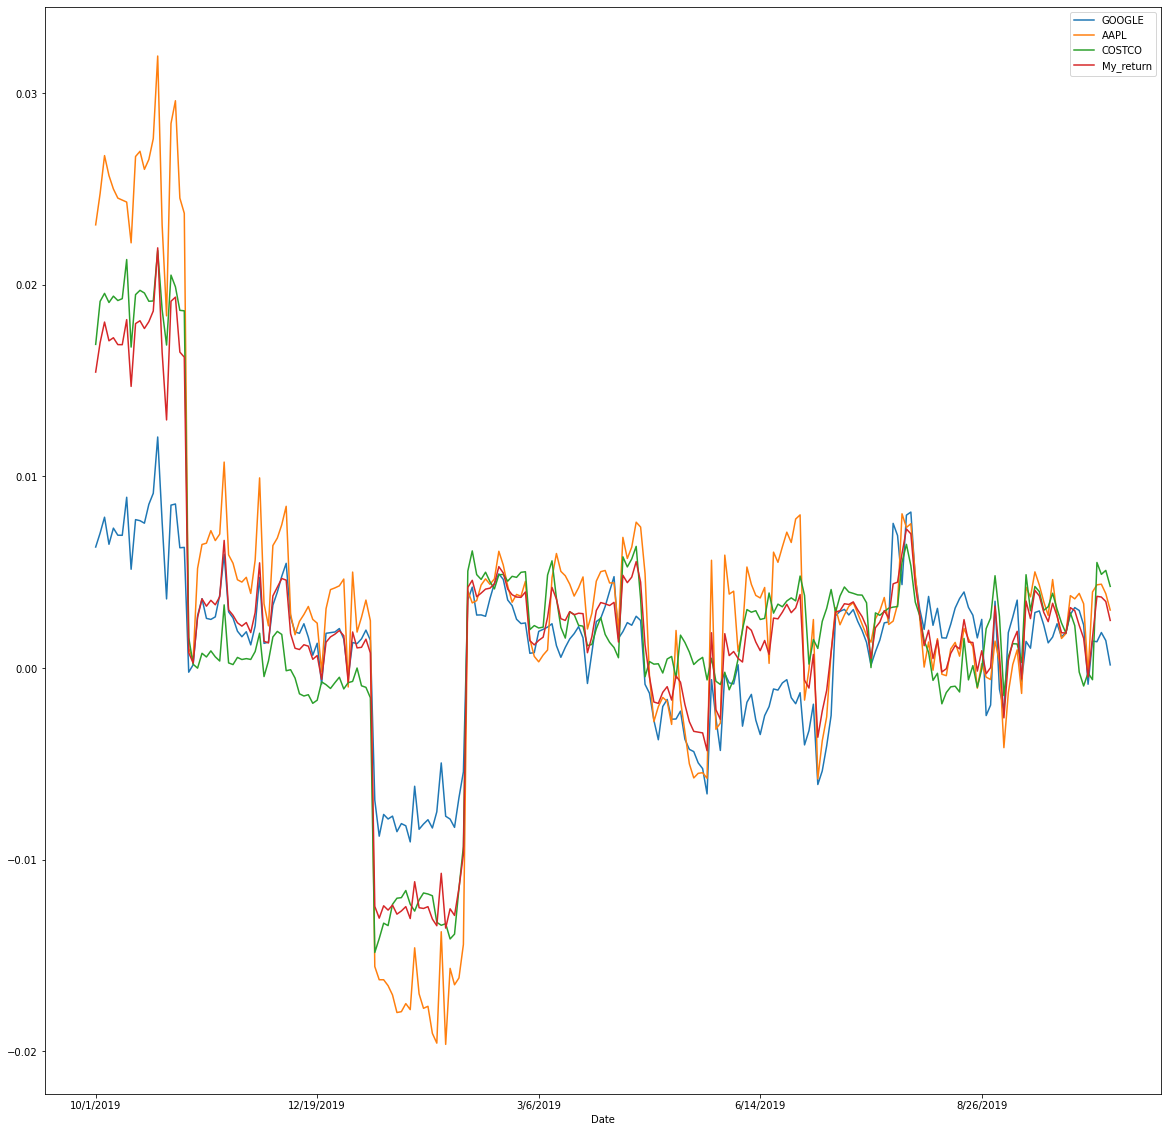

In [590]:

cust_roll.dropna().plot(figsize=(20,20));

In [431]:
#calculating and plotting the correlation
cust_corr=comb_cust_weight.corr()

<AxesSubplot:>

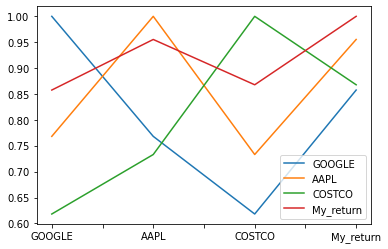

In [432]:
cust_corr.plot()

In [435]:
#calculating the rolling and covarince and also ploting the graph
cust_covar_rolling=comb_cust_weight['My_return'].rolling(window=60).cov(combine_df['SP_RETURN'])
cust_var_roling=combine_df['SP_RETURN'].rolling(window=60).var()

In [594]:
cust_covar_rolling.dropna()

Date
2019-04-08    0.000021
2019-04-09    0.000021
2019-04-10    0.000020
2019-04-11    0.000021
2019-04-12    0.000022
2019-04-15    0.000024
2019-04-16    0.000021
2019-04-17    0.000021
2019-04-18    0.000021
2019-04-22    0.000016
dtype: float64

In [437]:

cust_var_FB=cust_covar_rolling/cust_var_roling

In [438]:
cust_var_FB=cust_var_FB.dropna()
cust_var_FB

Date
2019-04-08    0.449577
2019-04-09    0.476877
2019-04-10    0.469468
2019-04-11    0.482829
2019-04-12    0.505068
2019-04-15    0.573405
2019-04-16    0.571665
2019-04-17    0.575118
2019-04-18    0.575449
2019-04-22    0.439512
dtype: float64

<AxesSubplot:ylabel='None'>

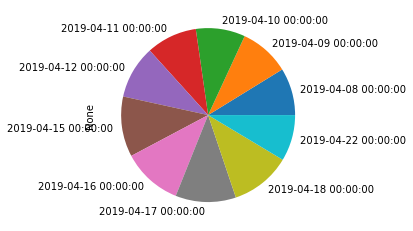

In [442]:
cust_var_FB.plot.pie()

In [359]:
#sharpi ratios for my portfolio
sharp_com_cust=((comb_cust_weight.mean()-(comb_cust_weight.iloc[:,3]).mean())*250)/(com_std*np.sqrt(250))#using paulson as the risk free rate
sharp_com_cust

FB            0.094065
Baxter       -0.222498
Maple_leaf    0.112107
My_return     0.000000
dtype: float64

<AxesSubplot:>

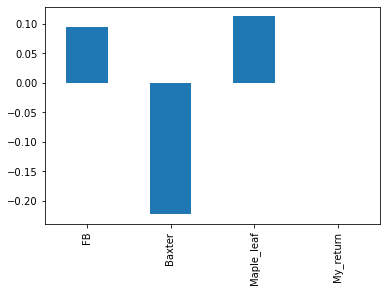

In [360]:
sharp_com_cust.plot.bar()